# CSE -Vishnu Pulipaka- 221710302064

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset in a proper structure

In [73]:
# reading csv "fifa19" game date
df=pd.read_csv("fifa_eda.csv")
df.head(10)

#filtering required columns for predicting value of player
df.isnull().sum().sort_values(ascending=False)
ndf=pd.DataFrame(df[["Name","Age","Overall","Position","Preferred Foot","Potential","International Reputation","Wage","Value"]])
ndf

,Name,Age,Overall,Position,Preferred Foot,Potential,International Reputation,Wage,Value
0,L. Messi,31,94,RF,Left,94,5.0,565.0,110500.0
1,Cristiano Ronaldo,33,94,ST,Right,94,5.0,405.0,77000.0
2,Neymar Jr,26,92,LW,Right,93,5.0,290.0,118500.0
3,De Gea,27,91,GK,Right,93,4.0,260.0,72000.0
4,K. De Bruyne,27,91,RCM,Right,92,4.0,355.0,102000.0
...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,47,CM,Right,65,1.0,1.0,60.0
18203,N. Christoffersson,19,47,ST,Right,63,1.0,1.0,60.0
18204,B. Worman,16,47,ST,Right,67,1.0,1.0,60.0
18205,D. Walker-Rice,17,47,RW,Right,66,1.0,1.0,60.0


# Get the number of rows and columns from the dataset

In [47]:
ndf.shape

(18207, 9)

# Check how many categorical and numerical columns are there
- Categorical - object type
- Numerical - int,float
- Boolean - bool


In [48]:
# numerical columns
num=ndf.select_dtypes(include=np.number).columns

# categorical columns
cat=ndf.select_dtypes(exclude=np.number).columns

#boolean
bo=ndf.select_dtypes(include="bool").columns
print("num:{}\ncat:{}\nbool:{}".format(list(num),list(cat),list(bo)))

num:['Age', 'Overall', 'Potential', 'International Reputation', 'Wage', 'Value']
cat:['Name', 'Position', 'Preferred Foot']
bool:[]


# Get the basic descriptive information from the dataset  

In [49]:
ndf.describe()

,Age,Overall,Potential,International Reputation,Wage,Value
count,18207.000000,18207.000000,18207.000000,18159.000000,18207.000000,17955.000000
mean,25.122206,66.238699,71.307299,1.113222,9.731312,2444.530214
std,4.669943,6.908930,6.136496,0.394031,21.999290,5626.715434
min,16.000000,46.000000,48.000000,1.000000,0.000000,10.000000
25%,21.000000,62.000000,67.000000,1.000000,1.000000,325.000000
50%,25.000000,66.000000,71.000000,1.000000,3.000000,700.000000
75%,28.000000,71.000000,75.000000,1.000000,9.000000,2100.000000
max,45.000000,94.000000,95.000000,5.000000,565.000000,118500.000000


# Get the frequency of the categories in all the columns of the dataset


In [50]:
ndf.Position.value_counts()

ST     2154
GK     2027
CB     1779
CM     1395
LB     1372
RB     1291
RM     1127
LM     1095
CAM     959
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [51]:
ndf["Preferred Foot"].value_counts()

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

In [54]:
# International reputation has only 5 numeric values ,hence it is categorical and already encoded with Labels
#removing label encoding as categories [1,2,3,4,5]
ndf["International Reputation"] = ndf["International Reputation"].astype('category')
ndf["International Reputation"].dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=False)

# Check for the missing values and if found any visualize the missing values using seaborn, missingno libraries.

In [56]:
ndf.isnull().sum().sort_values(ascending=False)

Value                       252
International Reputation     48
Wage                          0
Potential                     0
Preferred Foot                0
Position                      0
Overall                       0
Age                           0
Name                          0
dtype: int64

In [57]:
import missingno as msno

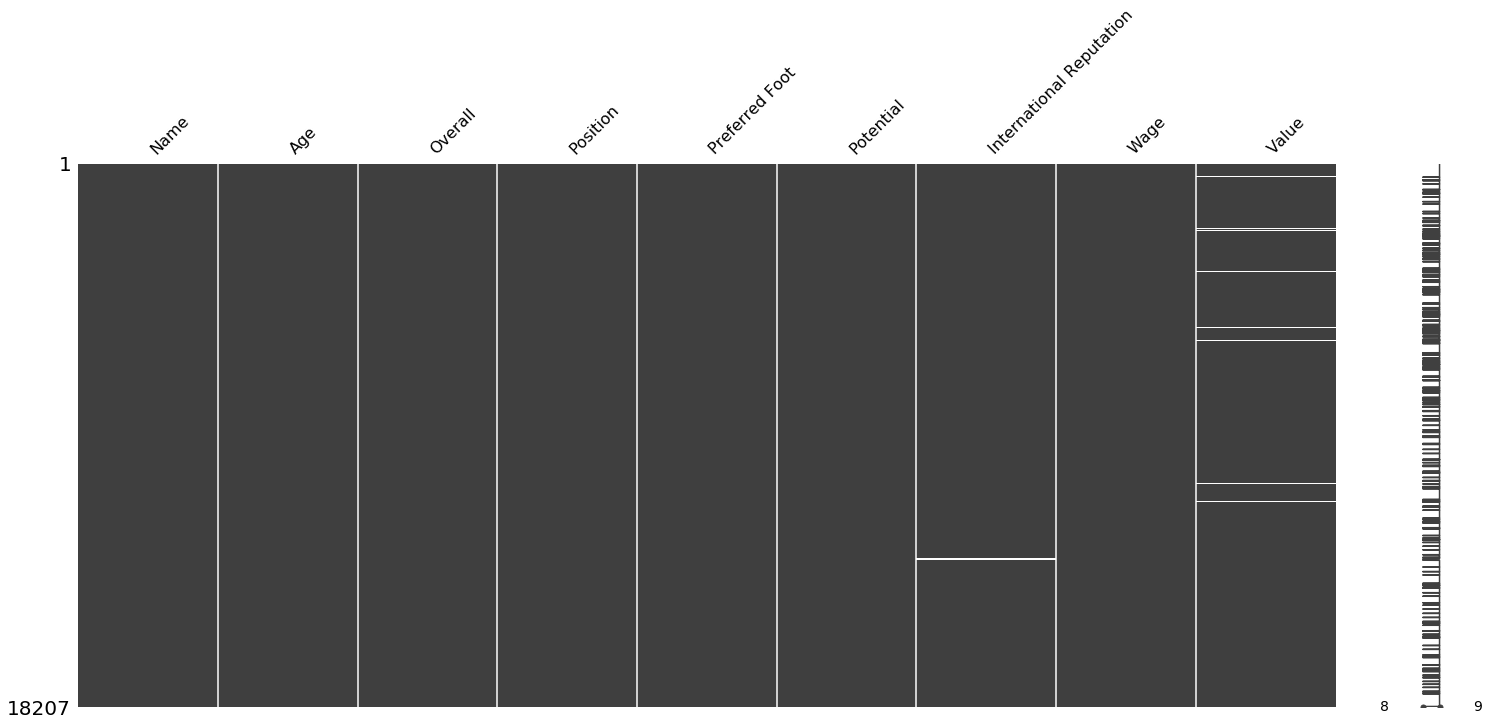

In [58]:
msno.matrix(ndf)

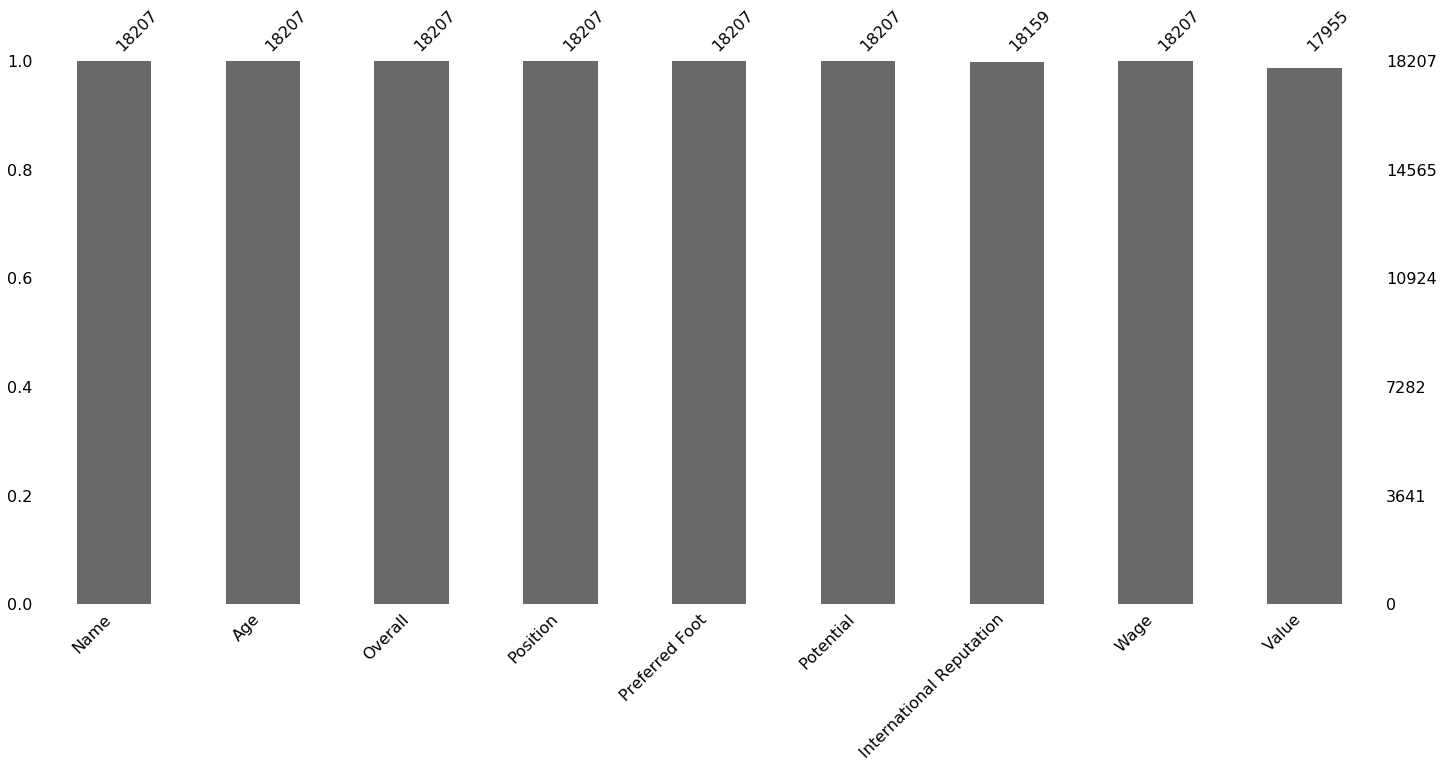

In [61]:
msno.bar(ndf)

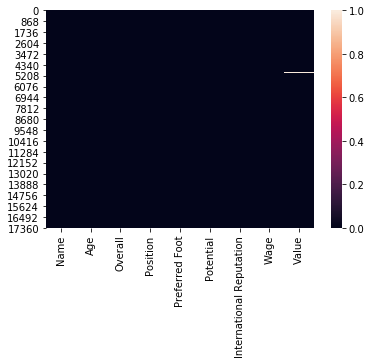

In [65]:
sns.heatmap(ndf.isna())
plt.show()

# Observation:
Only International Reputation and values have missing values.

# Impute the missing values based on numerical and categorical

In [66]:
ndf.isnull().sum()

Name                          0
Age                           0
Overall                       0
Position                      0
Preferred Foot                0
Potential                     0
International Reputation     48
Wage                          0
Value                       252
dtype: int64

In [69]:
# Imputing missing values in International Reputation:
ndf['International Reputation'].fillna(ndf["International Reputation"].mode()[0],inplace=True)


In [70]:
# Imputing missing values in :
ndf.Value.fillna(ndf.Value.mean(),inplace=True)

In [71]:
ndf.isnull().sum()

Name                        0
Age                         0
Overall                     0
Position                    0
Preferred Foot              0
Potential                   0
International Reputation    0
Wage                        0
Value                       0
dtype: int64

# Plot all the columns from the dataset; try to get some observations from the plot and write your inferences below the plots generated


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A18BED088>,
      dtype=object)

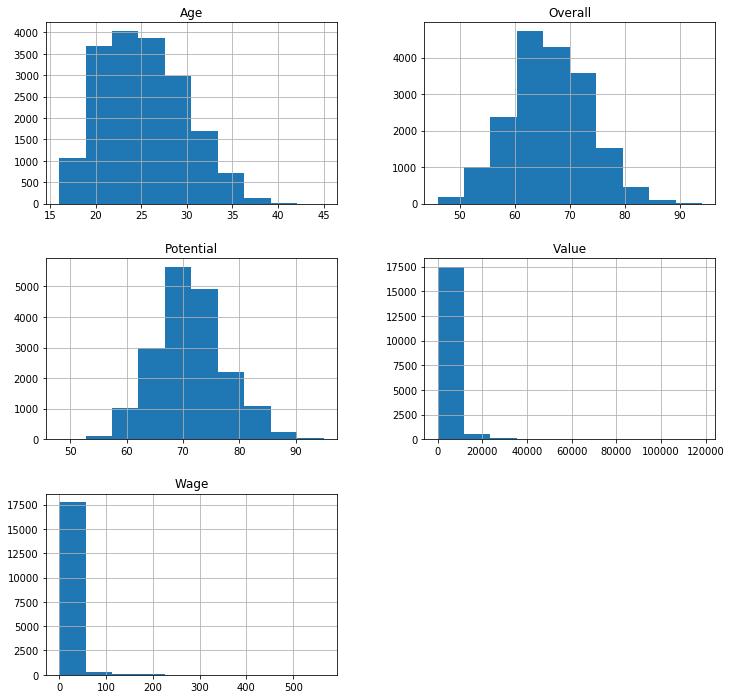

In [72]:
ndf.hist(figsize=(12,12))

In [ ]:
# Inferences
# Age : more players of ages 20-30 /almost normal distribution
# Overall and Potential between 60 to 80 is concetrtated, hence more players in this bracket
# Very few players over the value of about 150,000 
# Maximum players recieve wages between 0 to 50K

Text(0.5, 1.0, 'Distribution of players based on Postion')

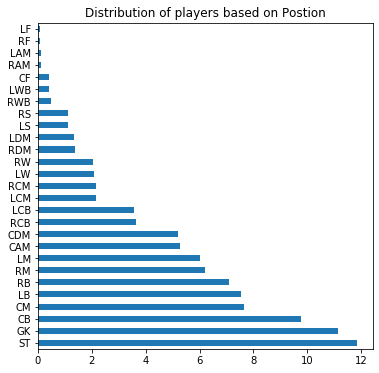

In [81]:
plt.figure(figsize=(6,6))
(ndf.Position.value_counts(normalize=True)*100).plot.barh().set_title('Distribution of players based on Postion')

In [ ]:
# Inferences:
# Striker(ST),Goal Keeper(GK),Centre Back(CB) are the most frequent positions
#Left Forward(LF),Right Forward(RF) and Left and Right Attacking Midfielders (LAM,RAM) are rarest positions

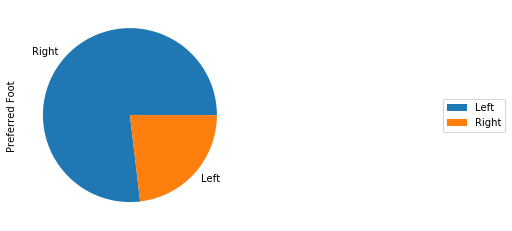

In [84]:
ndf["Preferred Foot"].value_counts().plot.pie().legend(labels=['Left','Right']
                                           ,loc='center right',
                                           bbox_to_anchor=(2.25,0.5))

In [ ]:
#Inference:
# left footed players are almost less than one-fourth of right footed players

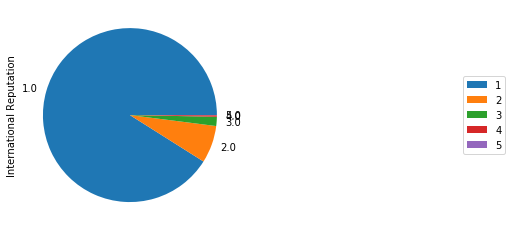

In [83]:
ndf["International Reputation"].value_counts().plot.pie().legend(labels=['1','2','3','4','5']
                                           ,loc='center right',
                                           bbox_to_anchor=(2.25,0.5))

Text(0.5, 1.0, 'International Reputation level(1 least to 5 highest)')

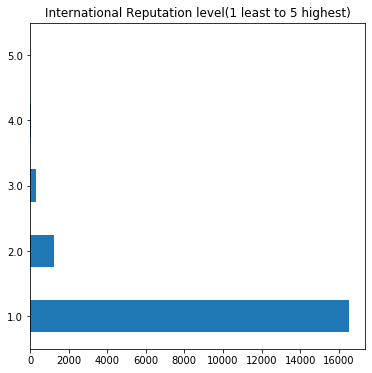

In [90]:
plt.figure(figsize=(6,6))
(ndf['International Reputation'].value_counts()).plot.barh().set_title('International Reputation level(1 least to 5 highest)')

In [ ]:
# Most players are in 1 category, least famous internationally

# Select any column as output  from the dataset and plot the output column with some of the input columns, which are suitable from your data columns


In [ ]:
# output column will be : Value

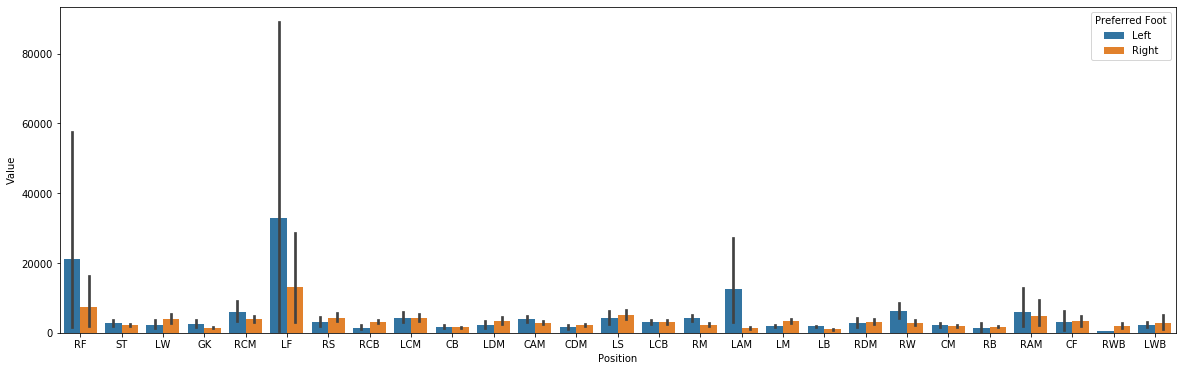

In [105]:
plt.figure(figsize=(20,6))
sns.barplot(x="Position",y="Value",hue="Preferred Foot",data=ndf)


In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x="Position",y="Value",hue="Preferred Foot",data=ndf)

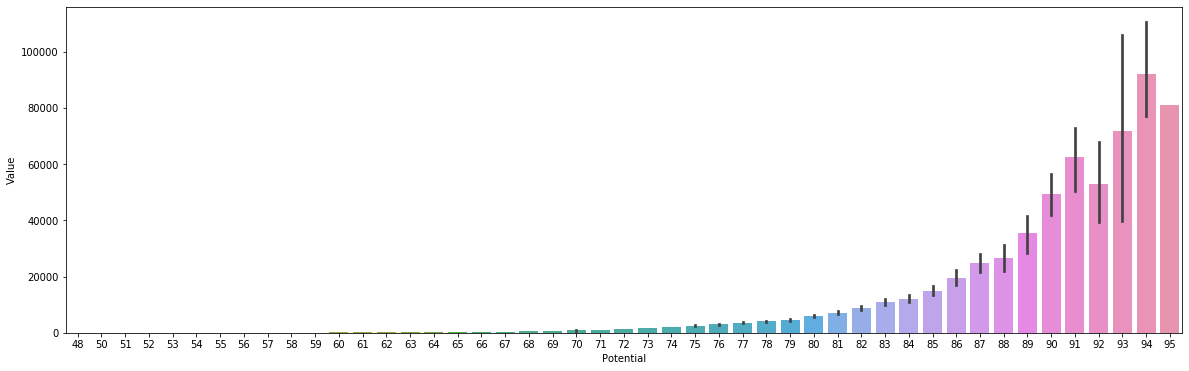

In [107]:
plt.figure(figsize=(20,6))
sns.barplot(x="Potential",y="Value",data=ndf)

# Encode the categorical columns using different kinds of encoding techniques from pandas and scikit-learn


In [119]:
# Using pandas Get_Dummies
df2=ndf.copy()
df2=pd.concat([df2,pd.get_dummies(df2.Position,prefix='Pos',drop_first=True),
               pd.get_dummies(df2["International Reputation"],prefix='IR',drop_first=True)],axis=1)

In [120]:
df2

,Name,Age,Overall,Position,Preferred Foot,Potential,International Reputation,Wage,Value,Pos_CB,...,Pos_RF,Pos_RM,Pos_RS,Pos_RW,Pos_RWB,Pos_ST,IR_2.0,IR_3.0,IR_4.0,IR_5.0
0,L. Messi,31,94,RF,Left,94,5.0,565.0,110500.0,0,...,1,0,0,0,0,0,0,0,0,1
1,Cristiano Ronaldo,33,94,ST,Right,94,5.0,405.0,77000.0,0,...,0,0,0,0,0,1,0,0,0,1
2,Neymar Jr,26,92,LW,Right,93,5.0,290.0,118500.0,0,...,0,0,0,0,0,0,0,0,0,1
3,De Gea,27,91,GK,Right,93,4.0,260.0,72000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,K. De Bruyne,27,91,RCM,Right,92,4.0,355.0,102000.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,47,CM,Right,65,1.0,1.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
18203,N. Christoffersson,19,47,ST,Right,63,1.0,1.0,60.0,0,...,0,0,0,0,0,1,0,0,0,0
18204,B. Worman,16,47,ST,Right,67,1.0,1.0,60.0,0,...,0,0,0,0,0,1,0,0,0,0
18205,D. Walker-Rice,17,47,RW,Right,66,1.0,1.0,60.0,0,...,0,0,0,1,0,0,0,0,0,0


In [121]:
#Using Scikit Learn for foot column
from sklearn.preprocessing import LabelEncoder
df2['Preferred Foot']=LabelEncoder().fit_transform(df2["Preferred Foot"])
df2.head()

,Name,Age,Overall,Position,Preferred Foot,Potential,International Reputation,Wage,Value,Pos_CB,...,Pos_RF,Pos_RM,Pos_RS,Pos_RW,Pos_RWB,Pos_ST,IR_2.0,IR_3.0,IR_4.0,IR_5.0
0,L. Messi,31,94,RF,0,94,5.0,565.0,110500.0,0,...,1,0,0,0,0,0,0,0,0,1
1,Cristiano Ronaldo,33,94,ST,1,94,5.0,405.0,77000.0,0,...,0,0,0,0,0,1,0,0,0,1
2,Neymar Jr,26,92,LW,1,93,5.0,290.0,118500.0,0,...,0,0,0,0,0,0,0,0,0,1
3,De Gea,27,91,GK,1,93,4.0,260.0,72000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,K. De Bruyne,27,91,RCM,1,92,4.0,355.0,102000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [124]:
# dropping unnecesary columns:
df2.drop(['Position','International Reputation'],axis=1,inplace=True)
df2.head()

,Name,Age,Overall,Preferred Foot,Potential,Wage,Value,Pos_CB,Pos_CDM,Pos_CF,...,Pos_RF,Pos_RM,Pos_RS,Pos_RW,Pos_RWB,Pos_ST,IR_2.0,IR_3.0,IR_4.0,IR_5.0
0,L. Messi,31,94,0,94,565.0,110500.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Cristiano Ronaldo,33,94,1,94,405.0,77000.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,Neymar Jr,26,92,1,93,290.0,118500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,De Gea,27,91,1,93,260.0,72000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,K. De Bruyne,27,91,1,92,355.0,102000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
